In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
df = pd.read_csv("6hitters.csv")
print("✅ Dataset Loaded Successfully!")
df.head()

✅ Dataset Loaded Successfully!


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df = df.fillna(df.mean(numeric_only=True))
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [5]:
le = LabelEncoder()
for col in ['League', 'Division', 'NewLeague']:
    df[col] = le.fit_transform(df[col])

print("\n✅ Label Encoding Done!")



✅ Label Encoding Done!


In [6]:
X = df[['CRuns']]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\n✅ Data Scaled Successfully!")



✅ Data Scaled Successfully!


In [8]:
Z = linkage(X_scaled, method='ward')

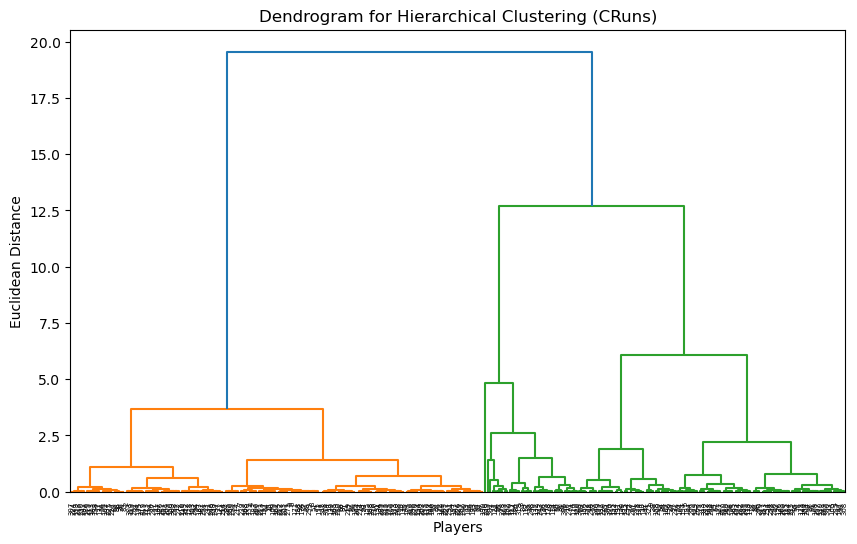

In [9]:
plt.figure(figsize=(10, 6))
dendrogram(Z)  # no_labels=True to prevent crowding
plt.title('Dendrogram for Hierarchical Clustering (CRuns)')
plt.xlabel('Players')
plt.ylabel('Euclidean Distance')
plt.show()


In [10]:
clusters = fcluster(Z, t=3, criterion='maxclust')
df['Cluster'] = clusters

print("\n✅ Hierarchical Clustering Applied Successfully!")
print(df[['CRuns', 'Cluster']].head())



✅ Hierarchical Clustering Applied Successfully!
   CRuns  Cluster
0     30        1
1    321        3
2    224        1
3    828        2
4     48        1


In [11]:
print("\nAverage Career Runs per Cluster:")
print(df.groupby('Cluster')['CRuns'].mean())


Average Career Runs per Cluster:
Cluster
1     118.732558
2    1046.000000
3     489.333333
Name: CRuns, dtype: float64


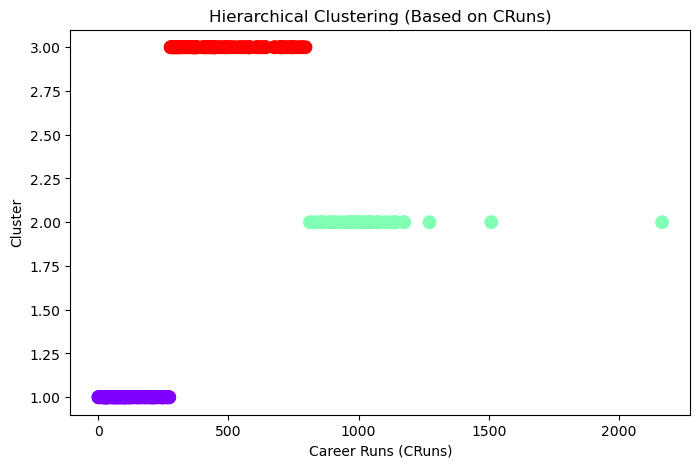

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(df['CRuns'], df['Cluster'], c=df['Cluster'], cmap='rainbow', s=80)
plt.xlabel('Career Runs (CRuns)')
plt.ylabel('Cluster')
plt.title('Hierarchical Clustering (Based on CRuns)')
plt.show()